In [1]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dire="../feature"
fea_minute_dire="../feature/testFeature/"
columns_drop=['c1_1min_mean','c2_1min_mean', 'c3_1min_mean', 'c1_1min_var',
       'c2_1min_var', 'c3_1min_var', 'c1_1min_range',
       'c2_1min_range', 'c3_1min_range', 'mean_spindel','var_spindel', 'range_spindel',
              
        'v1_minvalue','v2_minvalue', 'v3_minvalue', 'v1_absmin', 'v2_absmin',
       'v3_absmin', 'v1_1min_mean','v2_1min_mean', 'v3_1min_mean', 'v1_1min_var',
       'v2_1min_var', 'v3_1min_var',  'v1_1min_range','v2_1min_range', 'v3_1min_range']

In [3]:
def plt_plot(y_real,y_predicted):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(y_real)),y_real, color='g')
    ax.plot(range(len(y_predicted)),y_predicted,color='r')
    plt.show()
def Error_compute(y_real,y_predicted):
    y_diff=y_real-y_predicted
    diff_positive=y_diff[y_diff>0]
    diff_negitive_0=y_diff[y_diff<=0]
    if diff_negitive_0.shape[0] >0:
        sum_negitive_error=sum(np.exp(-np.log(0.5)*(diff_negitive_0/5)))
    else:
        sum_negitive_error=0
    if diff_positive.shape[0] >0:
        sum_positive_error=sum(np.exp(np.log(0.5)*(diff_positive/20)))
    else:
        sum_positive_error=0
    return (sum_negitive_error+sum_positive_error)/len(y_real)

In [45]:
df_feature=pd.DataFrame()
for _ in range(1,4):
    df_temp = pd.read_csv(os.path.join(data_dire,str(_)+"_v_c_s_feature.csv"))
    df_cnn_result=pd.read_csv("../CNN/%d_cnn_predicted.csv"%_)
    df_cnn_result=df_cnn_result/100
    if _==1:
        df_temp = df_temp[:-60]
    df_temp=pd.concat([df_temp,df_cnn_result[:df_temp.shape[0]]],axis=1)

    df_feature=df_feature.append(df_temp)
print(df_feature.columns,df_feature.shape)
df_train=df_feature
y_train = df_train["residual_life"]
df_train.drop(columns="residual_life",inplace=True)

columns_list=list(df_train.columns)
columns_list.remove("predicted")
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(df_train[columns_list])
x_train = np.concatenate((x_train,df_train["predicted"].values.reshape(x_train.shape[0],-1)),axis=1)
print(x_train.shape)

Index(['c1_absmean', 'c2_absmean', 'c3_absmean', 'c1_absmedia', 'c2_absmedia',
       'c3_absmedia', 'c1_absrange', 'c2_absrange', 'c3_absrange',
       'c1_absstdn', 'c2_absstdn', 'c3_absstdn', 'c1_absvar', 'c2_absvar',
       'c3_absvar', 'c1_maxvalue', 'c2_maxvalue', 'c3_maxvalue', 'c1_absmax',
       'c2_absmax', 'c3_absmax', 'c1_minvalue', 'c2_minvalue', 'c3_minvalue',
       'c1_absmin', 'c2_absmin', 'c3_absmin', 'tool_age', 'residual_life',
       'c1_1min_mean', 'c2_1min_mean', 'c3_1min_mean', 'c1_1min_var',
       'c2_1min_var', 'c3_1min_var', 'c1_1min_range', 'c2_1min_range',
       'c3_1min_range', 'mean_spindel', 'var_spindel', 'range_spindel',
       'v1_absmean', 'v2_absmean', 'v3_absmean', 'v1_absmedia', 'v2_absmedia',
       'v3_absmedia', 'v1_absrange', 'v2_absrange', 'v3_absrange',
       'v1_absstdn', 'v2_absstdn', 'v3_absstdn', 'v1_absvar', 'v2_absvar',
       'v3_absvar', 'v1_maxvalue', 'v2_maxvalue', 'v3_maxvalue', 'v1_absmax',
       'v2_absmax', 'v3_absmax', 'v1

In [46]:
clf = SVR(gamma='auto')
clf.fit(x_train, y_train)
print("fit finished")

fit finished


(600, 76) Index(['c1_absmean', 'c2_absmean', 'c3_absmean', 'c1_absmedia', 'c2_absmedia',
       'c3_absmedia', 'c1_absrange', 'c2_absrange', 'c3_absrange',
       'c1_absstdn', 'c2_absstdn', 'c3_absstdn', 'c1_absvar', 'c2_absvar',
       'c3_absvar', 'c1_maxvalue', 'c2_maxvalue', 'c3_maxvalue', 'c1_absmax',
       'c2_absmax', 'c3_absmax', 'c1_minvalue', 'c2_minvalue', 'c3_minvalue',
       'c1_absmin', 'c2_absmin', 'c3_absmin', 'tool_age', 'c1_1min_mean',
       'c2_1min_mean', 'c3_1min_mean', 'c1_1min_var', 'c2_1min_var',
       'c3_1min_var', 'c1_1min_range', 'c2_1min_range', 'c3_1min_range',
       'mean_spindel', 'var_spindel', 'range_spindel', 'v1_absmean',
       'v2_absmean', 'v3_absmean', 'v1_absmedia', 'v2_absmedia', 'v3_absmedia',
       'v1_absrange', 'v2_absrange', 'v3_absrange', 'v1_absstdn', 'v2_absstdn',
       'v3_absstdn', 'v1_absvar', 'v2_absvar', 'v3_absvar', 'v1_maxvalue',
       'v2_maxvalue', 'v3_maxvalue', 'v1_absmax', 'v2_absmax', 'v3_absmax',
       'v1_minval

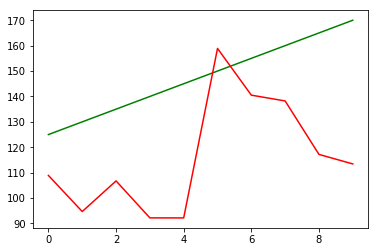

real
125.0    108.907532
130.0     94.691425
135.0    106.752655
140.0     92.200773
145.0     92.187233
150.0    158.904541
155.0    140.515645
160.0    138.228324
165.0    117.184045
170.0    113.442233
Name: predicted, dtype: float64


In [59]:
test_index=5
test_filename="%d_v_c_s_feature.csv"%test_index
df_test=pd.read_csv(os.path.join(fea_minute_dire,test_filename))
df_cnn_result=pd.read_csv("../CNN/%d_cnn_test_predicted.csv"%_)
df_cnn_result=df_cnn_result/100

df_test.drop(columns='residual_life',inplace=True)
df_test=df_test.fillna(method = 'ffill', axis=0)#nan前向填充
# df_test.drop(columns=columns_test_drop,inplace=True)#不使用分钟特征
print(df_test.shape,df_test.columns)
y_test=df_test['tool_age']
min_max_scaler = preprocessing.MinMaxScaler()
x_test = min_max_scaler.fit_transform(df_test)
x_test=np.concatenate((x_test,df_cnn_result["predicted"].values.reshape(x_test.shape[0],-1)),axis=1)
print(x_test.shape)

y_predicted=clf.predict(x_test)

df_result=pd.DataFrame({"real":y_test,"predicted":y_predicted})
# plt_plot(y_test,y_predicted)
# err=Error_compute(y_test,y_predicted)
# print(err)

df_predict=df_result["predicted"].groupby(df_result['real']).mean()
err=Error_compute(df_predict.index,df_predict)
print(err)
plt_plot(df_predict.index,df_predict)
print(df_predict)

In [60]:
temp_list=[]
for index,temp in zip(range(0,10),df_predict):
    temp_list.append(temp-(5*(10-index)))
print(temp_list)
print(min(temp_list))

[58.90753161213837, 49.69142465635795, 66.75265492798171, 57.20077344324808, 62.187233413762115, 133.9045414994093, 120.51564505334491, 123.22832425627925, 107.18404519163427, 108.44223343204366]
49.69142465635795
